In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


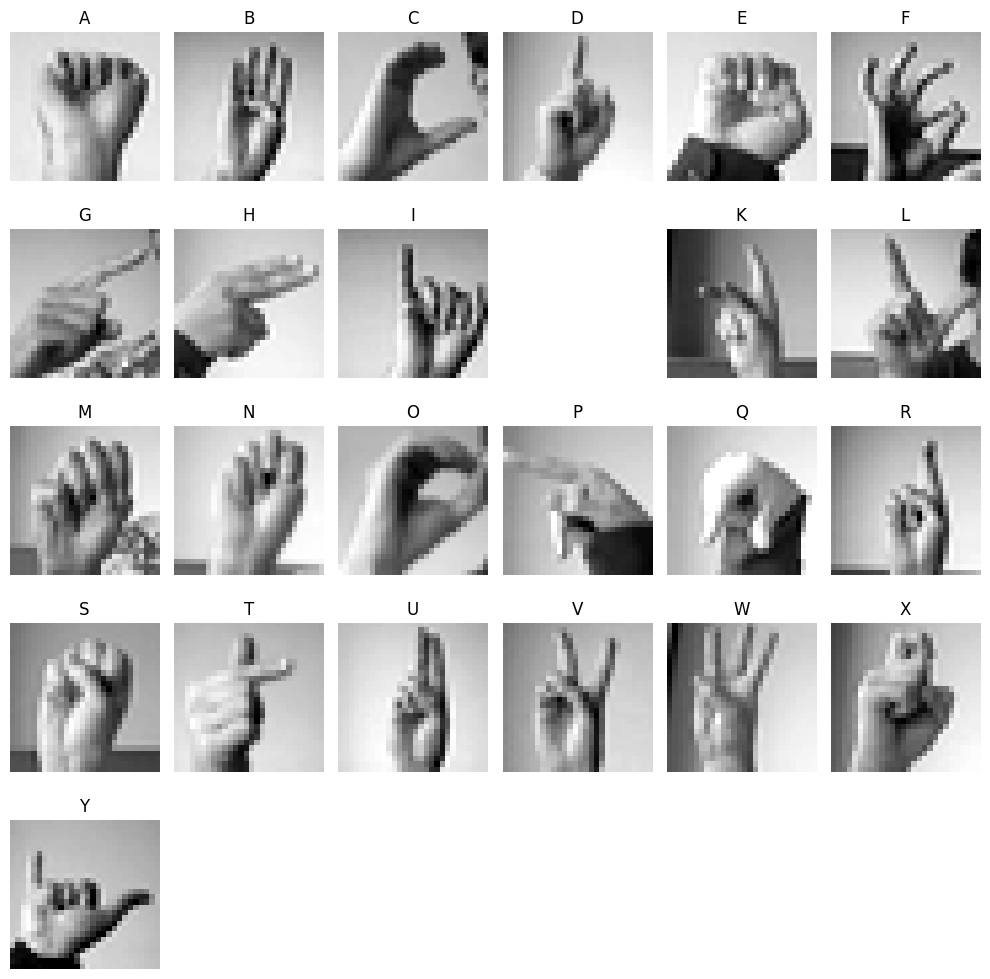

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training data
train_data_path = '/content/drive/MyDrive/sign_lang/sign_mnist_train.csv'
train_data = pd.read_csv(train_data_path)

# Separate labels and features
labels = train_data['label']
images = train_data.drop('label', axis=1).values

# Reshape the images to 28x28
images = images.reshape(-1, 28, 28)

# Function to decode the labels to alphabets
def decode_label(label):
    return chr(label + ord('A'))

# Create a figure to display one image per class
plt.figure(figsize=(10, 10))

# Loop through each class
for i in range(26):
    # Find the first occurrence of each class
    class_indices = np.where(labels == i)[0]

    if len(class_indices) > 0:
        index = class_indices[0]

        # Plot the image
        plt.subplot(5, 6, i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(decode_label(i))
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# File path for training and testing data
train_file_path = '/content/drive/MyDrive/sign_lang/sign_mnist_train.csv'
test_file_path = '/content/drive/MyDrive/sign_lang/sign_mnist_test.csv'


train_data = pd.read_csv(train_file_path)
print("Training Data (first 5 rows):")
print(train_data.head())

X_train = train_data.iloc[:, 1:].values.astype('float32') / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values  # Labels

# Print the shapes of the training data arrays
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Load the testing data
test_data = pd.read_csv(test_file_path)
print("Testing Data (first 5 rows):")
print(test_data.head())

X_test = test_data.iloc[:, 1:].values.astype('float32') / 255.0  # Normalize pixel values
y_test = test_data.iloc[:, 0].values  # Labels

# Print the shapes of the testing data arrays
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Training Data (first 5 rows):
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  


In [ ]:
# Reshape the data to fit the CNN (assuming 28x28 images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=26)  # 26 classes for 26 letters
y_test = to_categorical(y_test, num_classes=26)  # 26 classes for 26 letters

# Print the reshaped arrays and labels (first 5 examples)
print("Reshaped X_train (first 5 examples):")
print(X_train[:5])
print("One-hot encoded y_train (first 5 examples):")
print(y_train[:5])

print("Reshaped X_test (first 5 examples):")
print(X_test[:5])
print("One-hot encoded y_test (first 5 examples):")
print(y_test[:5])


Reshaped X_train (first 5 examples):
[[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 classes for 26 letters
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Save the model
model.save('sign_language_model.h5')

Epoch 1/100
687/687 [==============================] - 6s 6ms/step - loss: 1.9274 - accuracy: 0.3992 - val_loss: 0.5259 - val_accuracy: 0.8885
Epoch 2/100
687/687 [==============================] - 4s 6ms/step - loss: 0.6507 - accuracy: 0.7760 - val_loss: 0.1578 - val_accuracy: 0.9765
Epoch 3/100
687/687 [==============================] - 6s 9ms/step - loss: 0.3799 - accuracy: 0.8695 - val_loss: 0.0616 - val_accuracy: 0.9942
Epoch 4/100
687/687 [==============================] - 4s 6ms/step - loss: 0.2655 - accuracy: 0.9078 - val_loss: 0.0294 - val_accuracy: 0.9993
Epoch 5/100
687/687 [==============================] - 3s 5ms/step - loss: 0.1990 - accuracy: 0.9314 - val_loss: 0.0105 - val_accuracy: 0.9998
Epoch 6/100
687/687 [==============================] - 3s 5ms/step - loss: 0.1609 - accuracy: 0.9440 - val_loss: 0.0072 - val_accuracy: 0.9998
Epoch 7/100
687/687 [==============================] - 4s 5ms/step - loss: 0.1287 - accuracy: 0.9561 - val_loss: 0.0039 - val_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('sign_language_model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28
    image = cv2.resize(image, (28, 28))

    # Invert the image (optional, depending on the dataset)
    image = cv2.bitwise_not(image)

    # Normalize pixel values to [0, 1]
    image = image.astype('float32') / 255.0

    # Reshape to fit the model input shape (28, 28, 1)
    image = np.reshape(image, (1, 28, 28, 1))

    return image

In [ ]:
# Function to decode the model prediction
def decode_prediction(pred):
    return chr(pred + ord('A'))


1/1 [==============================] - 0s 17ms/step


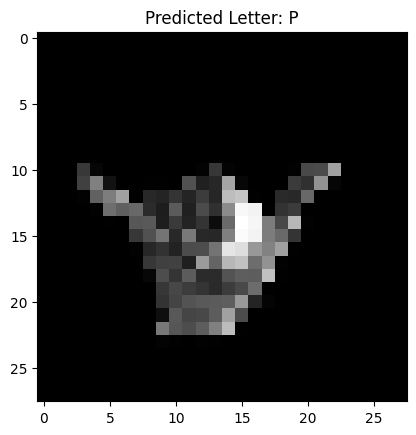

Predicted Letter: P


In [ ]:
# Path to the external image
image_path = 'Sign_Language_Y.jpg'  # Change this to your image path

# Preprocess the image
image = preprocess_image(image_path)
# print(image)

# Predict the letter
prediction = model.predict(image)
predicted_label = np.argmax(prediction, axis=1)[0]
predicted_letter = decode_prediction(predicted_label)

# Display the image and prediction
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Letter: {predicted_letter}')
plt.show()

print(f'Predicted Letter: {predicted_letter}')